# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We are tasked with identifying the *key drivers* for used car prices. Let's start with our business understanding as outlined by the CRISP-DM approcah.
We are going to structure our *Stage 1* as follows,
**Business Understanding**
- **Problem statement**: “What factors drive used car prices?”
- **Audience**: used car dealers.
- **Success metric**: good predictive performance + interpretable coefficients

---
### Business Understanding

A used car dealership wants to understand **what drives the price of a used car** so they can make smarter decisions about which vehicles to buy, how to price them, and which features to highlight to customers.

From a business perspective, the key questions are:

- Which characteristics (e.g., brand, age, mileage, fuel type, transmission) most strongly influence price?
- Which combinations of features tend to command a premium?
- Where are the biggest discounts or price penalties (e.g., high mileage, older cars, certain brands or trims)?

From a data perspective, we can frame this as a **supervised regression problem**:

- **Target variable:** `price` (continuous)
- **Features (predictors):** vehicle attributes such as `year`, `mileage`, `brand`, `model`, `fuel`, `transmission`, `condition`, etc.
- **Goal:** 
  - Build regression models that can **predict price** reasonably well.
  - Use **model coefficients and feature importance** to interpret which factors increase or decrease price, holding other variables constant.

Success will be measured by:

- A clear, interpretable model (or set of models) that explains **which features matter most**.
- A reasonable error metric (e.g., RMSE or MAE) that shows the model captures pricing patterns.
- Actionable insights that a nontechnical audience (used car dealers) can use to **fine‑tune inventory and pricing strategy**.

### Data Exploration Findings
*Because the dataset contains substantial missing values and some unrealistic entries (e.g., extreme prices, odometer readings, and years), part of the technical challenge will involve cleaning and filtering the data before modeling. Many categorical variables such as manufacturer, model, condition, cylinders, and drive have missingness ranging from 20% to 70%, so we will need to decide whether to impute, simplify, or drop certain features.*

*Given that our audience is a used car dealership, our modeling approach must balance predictive performance with interpretability. Linear and regularized regression models will allow us to quantify how each feature (e.g., mileage, age, brand, transmission) affects price while still producing actionable insights.*

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Understanding

In this phase of CRISP‑DM, our goal is to become familiar with the used car dataset, assess data quality, and begin forming hypotheses about which features may influence price.

Key objectives for this stage:
- Load the dataset and inspect its structure.
- Understand the types of variables (categorical vs. numerical).
- Identify missing values, duplicates, and potential outliers.
- Explore basic descriptive statistics.
- Begin forming expectations about which features may be predictive of price (e.g., mileage, age, brand).

*These steps will help us ensure that our later modeling work is grounded in a solid understanding of the data and any limitations it may contain.*

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [6]:
# Load the provided dataset
df = pd.read_csv("data/vehicles.csv") 

# Lets us start by getting a basic grasp on the CSV - Previewing the first few rows
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# pulling out last few rows to check for any anomalies at the end of the dataset
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
# Shape of the dataset
print("Dataset shape:", df.shape)
# Total of 426,881 rows and 20 columns

# Column types and non-null counts
df.info()

Dataset shape: (426880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880

In [ ]:
# Summary statistics for numerical variables
df.describe()
# only 4 numerical columns: year, odometer, price, lat, and long. The rest are categorical or object types.

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
# Summary statistics for numerical variables
df.describe().T # Lets us transpose the output for better readability

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [15]:
# Let us count missing values per column
df.isnull().sum().sort_values(ascending=False)


size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
region               0
id                   0
price                0
state                0
dtype: int64

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
region           0.000000
id               0.000000
price            0.000000
state            0.000000
dtype: float64


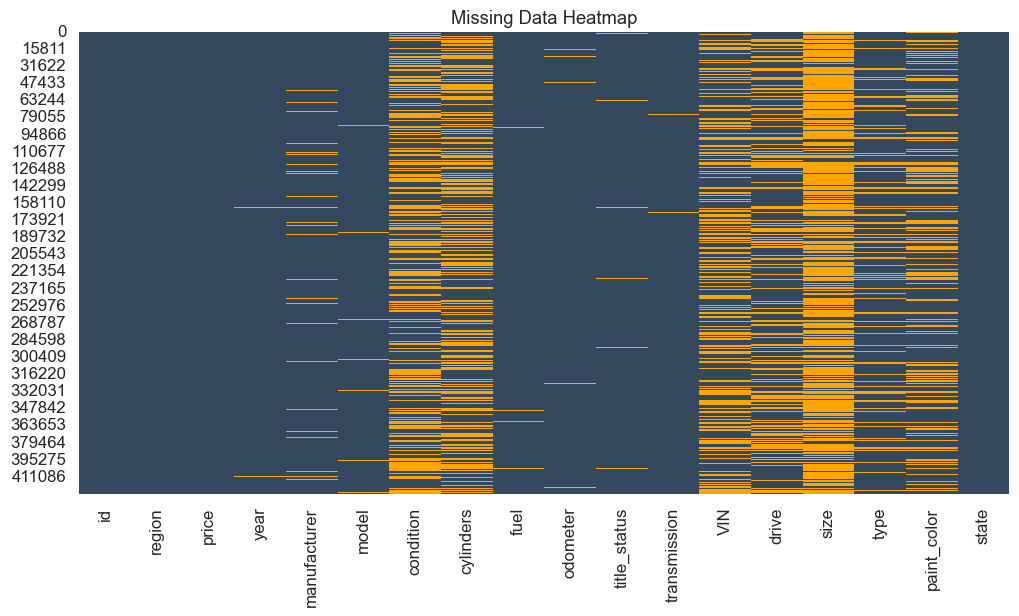

In [20]:
# Let us also check the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))

# Lets us visualize the missing data pattern using a heatmap
plt.figure(figsize=(12, 6))
colors = ['#34495E', 'orange'] # 0: False (present), 1: True (missing)
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(colors)) #instead of cmap='viridis', let us use a custom palette to make it more visually appealing
plt.title("Missing Data Heatmap")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.